# Sheet 5 Exercise 2: Linear Neural Field (Credits: 4)
Note: All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Consider a linear neural field given by the equation
$$
    \tau\dot{u}(x,t) = -u(x,t) + \int_{-\infty}^\infty w(x-x^\prime) u(x^\prime,t)\text{d}x^\prime + s(x,t),
$$

for $x, t\in\mathbb{R}$.

#### 2.1
Assume that the input signal is constant and given by
$$
s(x) = \frac{1}{2\sqrt{\pi}d}\exp\left(-\frac{x^2}{4d^2}\right).
$$
Assume further that the interaction kernel is given by the Gabor function
$$
w(x) = \frac{1}{\sqrt{\pi}b} a\left( \exp\left( -\frac{x^2}{4b^2} \right) \cos(k_0 x) \right).
$$
Derive an equation for the stationary solution of the system.

*Hint:* Assume that the system has a stable solution that does not depend on time.

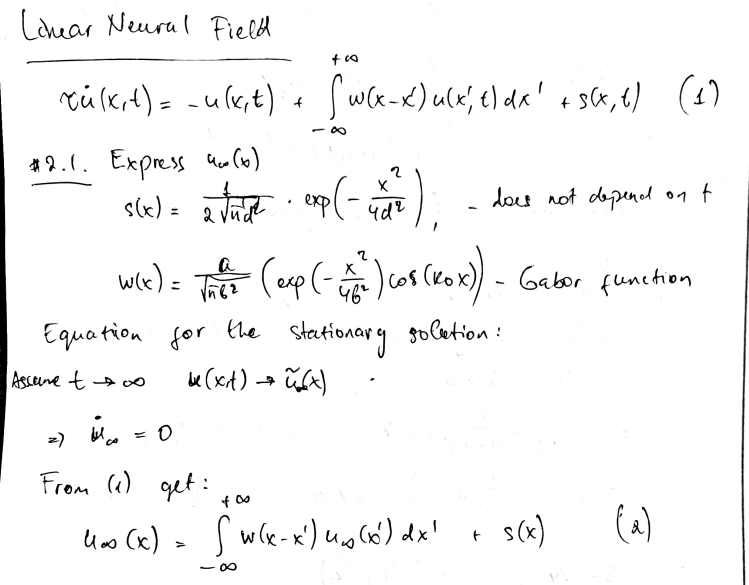

#### 2.2
Solve the resulting equation from 2.1 for the stationary solution $u^\ast (x)$ using the Fourier transform.

*Hint:* The Fourier transform of the Gaussian function $f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left( - \frac{x^2}{2\sigma^2} \right)$ is given by 
$$
\tilde{f}(k) = \mathcal{F}[f](k) = \exp\left( -\frac{\sigma^2 k^2 }{2} \right).
$$
You can use this identity to find the Fourier transforms of both $s$ and $w$. First, think about how you have to define $\sigma$ in $f$ to get $s$ into the Gaussian form. Then for $w$, use the identity $\cos(x) = \frac{1}{2}(e^{ix}+e^{-ix})$. Then you can use the time-shift property of the Fourier transform to get rid of the exponentials. You will be left with another Gauss-like term that you can treat similarly to $s$ to find its transform.

The time-shift property states that $\mathcal{F}[f(x)\exp(i k_0 x)](k) = \tilde{f}(k-k_0)$.

The solution has a closed form in the frequency domain.


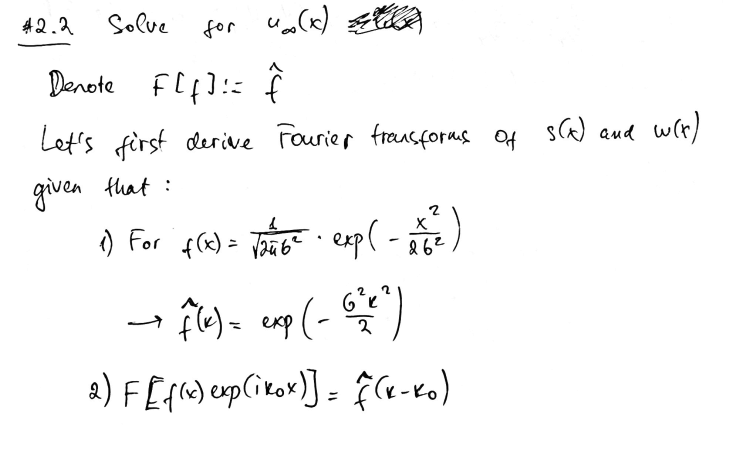

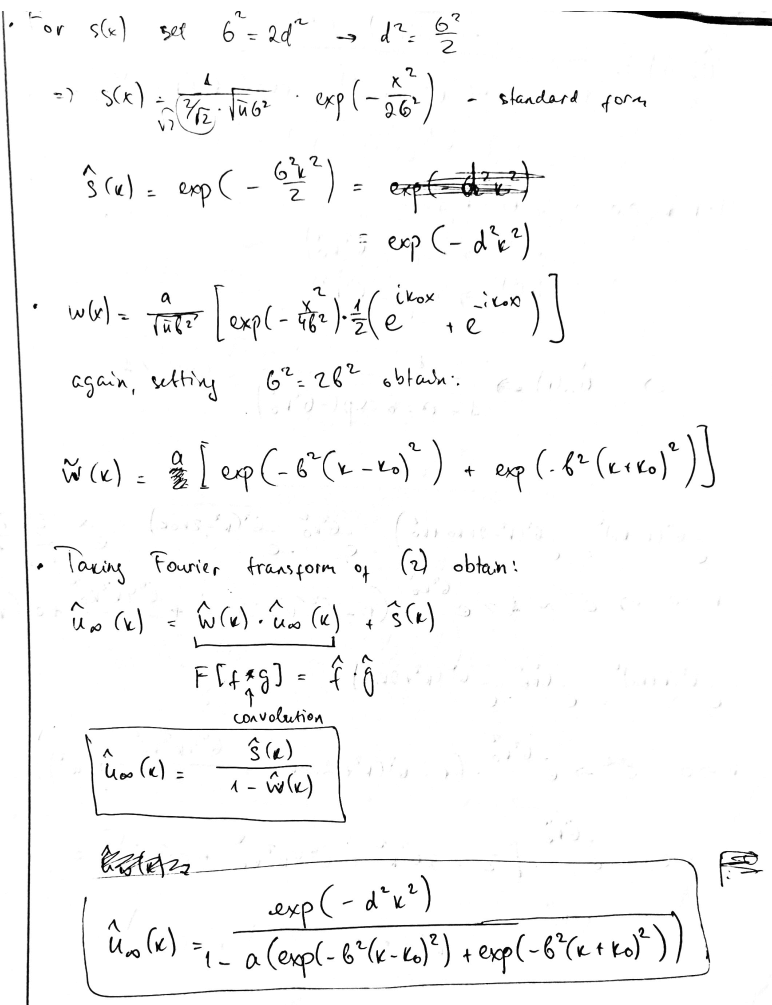

#### 2.3
What do you predict to happen in the x-domain if the parameter a is approaching 1 from below? Only consider the cases $b >> d$ and $d >> b$.

*Hint:* Think about what happens for very small $k$ and for $k$ close to $\pm k_0$. You can use the inverse Fourier transform in the regions around these points to get approximate solutions in the $x$-domain.

You can again use the Fourier transform of the Gaussian, and the fact that $\mathcal{F}[\delta(x)](k)=1$.

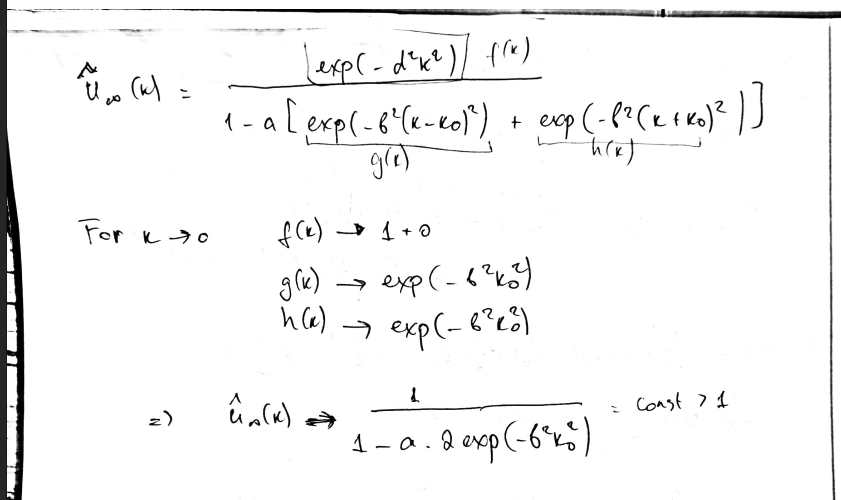

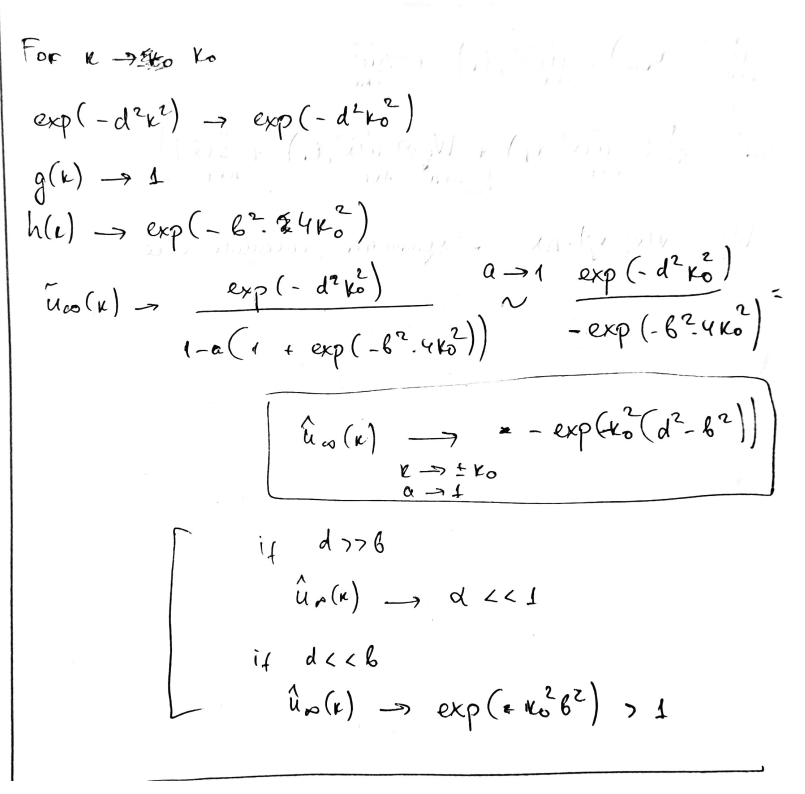

*Let us also construct $\hat{u}_\infty(k)$ plots for different cases listed in the next sub-exercise. Using inverse-fourier transform implemented in standard libraries it is possible to transform the solution from frequency domain to spatial domain.*

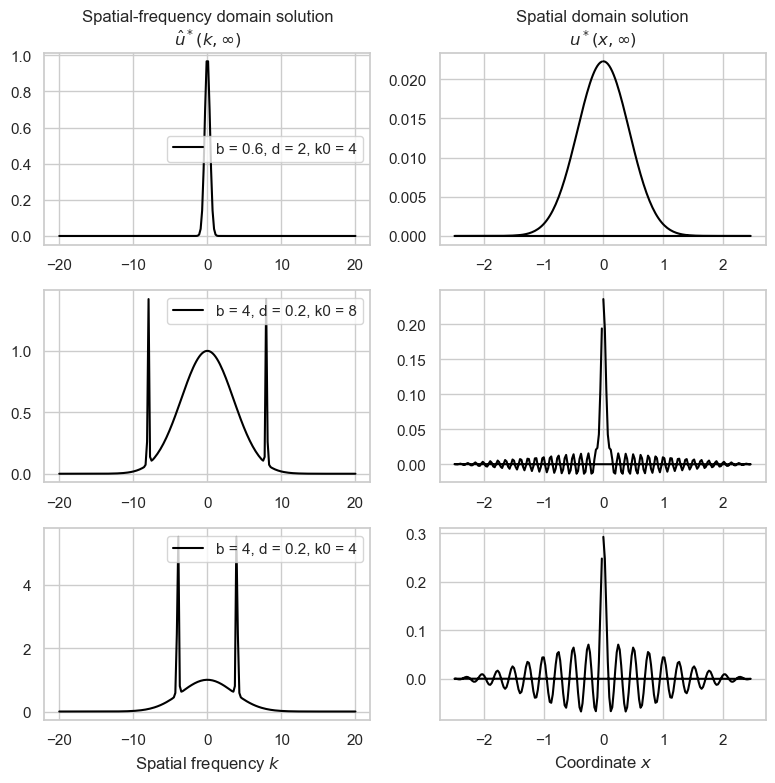

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft
import seaborn
seaborn.set_context('notebook', font_scale=1)
seaborn.set_style('whitegrid')
seaborn.color_palette('colorblind')
#plt.rcParams.update({"text.usetex": True})


def get_Fu_inf(k_grid, args):
    a, b, d, k0 = args
    k = k_grid
    top = np.exp(-d**2 * k**2)
    bottom = 1 - a * (np.exp(-b**2 * (k - k0)**2) + np.exp(-b**2 * (k + k0) ** 2))
    return top / bottom
  
k_grid = np.linspace(-20, 20, 200)
default_args = (1, 4, 0.2, 4)

a = 1
b_list = [0.6, 4, 4]
d_list = [2, 0.2, 0.2]
k0_list = [4, 8, 4]

delta_x = 1 / (k_grid[1] - k_grid[0])

fig, axes = plt.subplots(len(b_list), 2, figsize=(8, 8))
for i in range(len(b_list)):
    b, d, k0 = b_list[i], d_list[i], k0_list[i]
    args = (a, b, d, k0)
    Fu = get_Fu_inf(k_grid, args)
    
    args_label = f"b = {b}, d = {d}, k0 = {k0}"
    
    # u_inf in spatial frequency domain
    ax = axes[i, 0]
    ax.plot(k_grid, Fu, color='black', linewidth=1.5, label=args_label)
    n = len(k_grid)
    dk = k_grid[1] - k_grid[0]
    ax.legend()
    
    # u_inf in spatial domain
    Fu = np.concatenate((np.array([Fu[n // 2]]), Fu[n // 2 + 1:], Fu[:n // 2]))
    u = ifft(Fu)
    ax = axes[i, 1]
    x_grid = np.concatenate((np.arange(n//2), -np.arange(1, n // 2 + 1)[::-1])) / (n * dk)
    ax.plot(x_grid, u.real, color='black', linewidth=1.5)
    
axes[0, 0].set_title("Spatial-frequency domain solution\n" + r"$\hat{u}^*(k, \infty)$")
axes[0, 1].set_title("Spatial domain solution\n" + r"$u^*(x, \infty)$") 


axes[2, 0].set_xlabel('Spatial frequency $k$')
axes[2, 1].set_xlabel('Coordinate $x$')
plt.tight_layout()

*Analysis of the stationary solution in the spatial frequency domain gives the following:*
- With $k \to 0$ the solution approaches a finite value, which does not depend on the ratio between $d$ and $b$.
- An interesting thing happens when $k \to \pm k_0$, where the denominator could play a role. In case of $d >> b$ solution is rather small, as $\hat{u}(k)$ is dominated by the input. The interactions between neurons are rather small, which results in a stationary solution in the spatial domain having the same shape as the input.
- With interaction strength being larger in amplitude two similar spectral peaks appear at the $k_0$ frequency. This means that the solution would have oscillatory component with a spatial frequency $k_0$. 

#### 2.4
Simulate the equation to find and plot the stationary solution by performing an Euler approximation, and replacing the integral by a Riemann sum s.t. $\int_A^B f(x)\text{d}x \approx \sum_{i=0}^n f(x_i)\Delta x$ with $x_i = A + i\Delta x$ and $\Delta x = \tfrac{B-A}{n}$.

Use the parameters $A=-10$, $B=10$, $n=300$, $\tau=10$, $a=1$, $b=0.6$, $d=2$, $k_0 = 4$. What do you observe? 

Then add some Gaussian noise to the input function $s$ by adding independent normals with variance $\sigma^2 = 0.01^2$ to each discretized point. What changes in the simulation? 

Finally, set $b=4$ and $d=0.2$. Plot the stationary solution for $k_0=4$ and $k_0=8$.

Can you relate the findings to 2.3?

*Let's first rewrite the equation for the finite difference scheme using Euler's approximation for time derivative and Riemann sum approximation for the intergral. The resulting equation can be rewriten in the matrix form:*

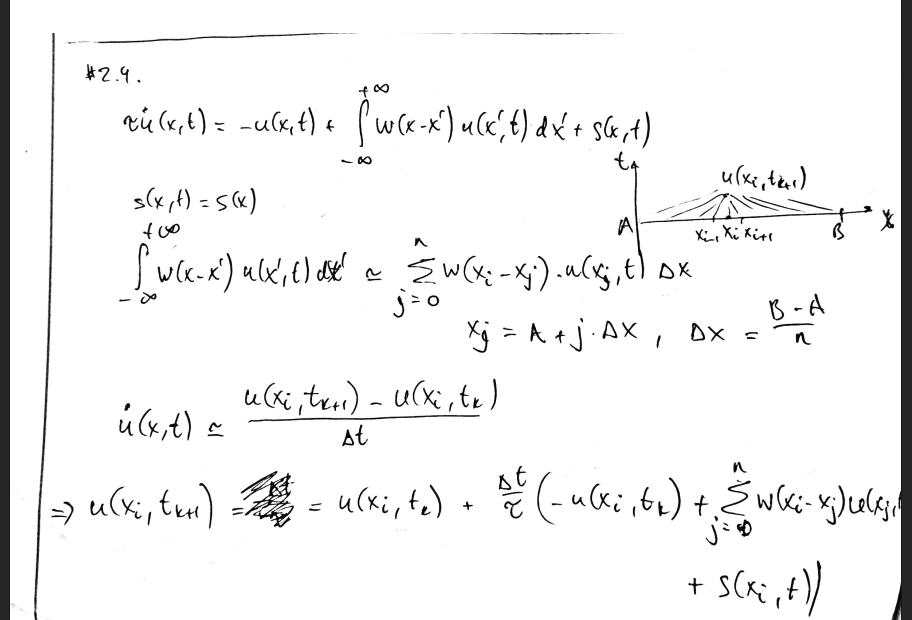

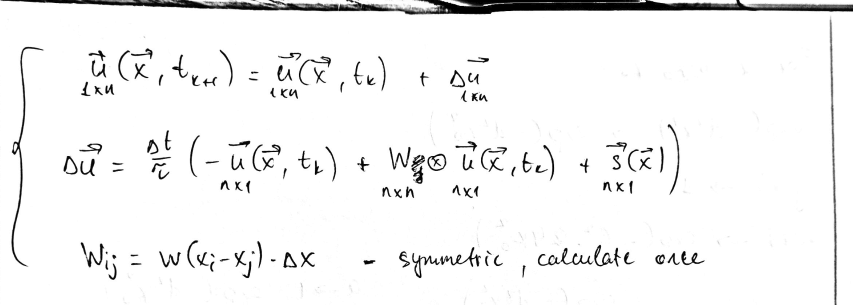

In [91]:
import numpy as np
import matplotlib.pyplot as plt

### YOUR CODE HERE ###

default_args = {
                'A': -10,   # start of the x interval
                'B': 10,    # stop of the x interval
                'n': 300,   # number of x-points
                'tau': 10,  # time-constant of the system
                'a': 1,     # proportion of the interaction
                'b': 0.6,   # strength of the interaction 
                'd': 2,     # strength of the input
                'k0': 4,    # spatial grating of cosine in Gabor function
                'dt': 1e-2, # temporal resolution of Euler's method
                'T': 2,    # time to stop simulation
                'add_noise': False,
                'sigma': 0.01 # noise sqrt(variance)
               }    


def get_interaction_kernel(x_grid, args):
    # setting params
    a, b, k0 = args['a'], args['b'], args['k0']
    n = len(x_grid)
    dx = x_grid[1] - x_grid[0]
    
    W = np.zeros((n, n))
    for i in range(n):
        for j in range(n):   
            delta_x = x_grid[i] - x_grid[j]
            W[i, j] = a / np.sqrt(np.pi * b**2) * (np.exp(-(delta_x**2 / (4 * b**2))) * np.cos(k0 * delta_x)) * dx
            
    return W


def get_input(x_grid, args):
    """Return **vector** (n, 1) of input"""
    d = args['d']
    s = 1 / (2 * np.sqrt(np.pi * d**2)) * np.exp(-x_grid**2 / (4 * d**2))
    if args['add_noise']:
        sigma = args['sigma']
        noise = np.random.normal(scale=sigma, size=len(x_grid))
        s += noise
    return s.reshape((len(x_grid), 1))


def get_du(u, W, s, args):
    """
    Input:
        u: np.array with shape (n, 1)
        W: (n, n) interaction kernel
        s: (n, 1) constant input
        args: configuration for the simulation. 
        
        Parameters needed to be specified: args['tau'], args['dt']
        
    Returns:
        du: (n, 1) vector to update the solution on the next timestep
    """
    dt = args['dt']
    tau = args['tau']
    
    # why there is matrix multiplication see the notes. 
    # It is a different notation for calculating Riemann integral for our special case
    du = dt / tau * (-u + W @ u + s)
    return du


def run_simulation(args, verbose=True):
    
    """
    Runs finite difference estimation for the neural fields specified by "args".
    Returns t, x, u:
        t: np.array, len(np.arange(0, T, dt))
        x: np.array, len(np.linspace(A, B, n))
        u: np.array, shape = (len(t), len(x))
    """
    
    if verbose: print(args)
    
    n = args['n']
    
    t_grid = np.arange(0, args['T'], args['dt'])
    x_grid = np.linspace(args['A'], args['B'], args['n'])
    
    s = get_input(x_grid, args)              # (n, 1)
    W = get_interaction_kernel(x_grid, args) # (n, n)
    
    # initialize solution array
    # will get this done with lists cause of nasty vectors of shape (n x 1)
    u_list = [np.zeros((n, 1))] # also set initial value u(x, t(0))
    
    for t in t_grid:
        du = get_du(u_list[-1], W, s, args)
        u_list.append(u_list[-1] + du)

    return t_grid, x_grid, np.array(u_list).squeeze()


def plot_simulation(t, x, u, args):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes[0]
    ax.imshow(u.T, aspect='auto', extent=[t[0], t[-1], x[0], x[-1]], cmap='gray')
    ax.set_xlabel("Time ($t$)")
    ax.set_ylabel("Space ($x$)")
    ax.set_title("Solution $u(x, t)$ \n" + f"Params: b = {args['b']}, d = {args['d']}, k0 = {args['k0']}")
    ax.grid()

    ax = axes[1]
    ax.plot(x, u[-1, :], color='black', linewidth=2)
    ax.set_title("Steady state solution $u(x, T)$")
    ax.set_xlabel("Coordinate $x$")

### YOUR CODE HERE ###

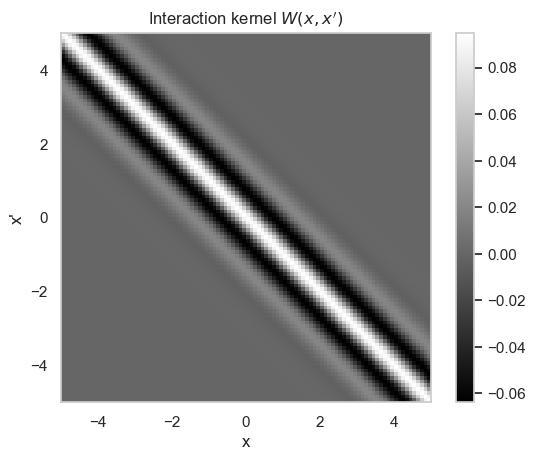

In [94]:
plt.title("Interaction kernel $W(x, x')$")
x_min, x_max = -5, 5
plt.imshow(get_interaction_kernel(np.linspace(x_min, x_max, 100), args), cmap='gray', extent=[x_min, x_max, x_min, x_max])
plt.xlabel("x")
plt.ylabel("x'")
plt.colorbar()
plt.grid()

#### 1. d > b

{'A': -10, 'B': 10, 'n': 300, 'tau': 1, 'a': 1, 'b': 0.6, 'd': 2, 'k0': 4, 'dt': 0.01, 'T': 10, 'add_noise': False, 'sigma': 0.01}


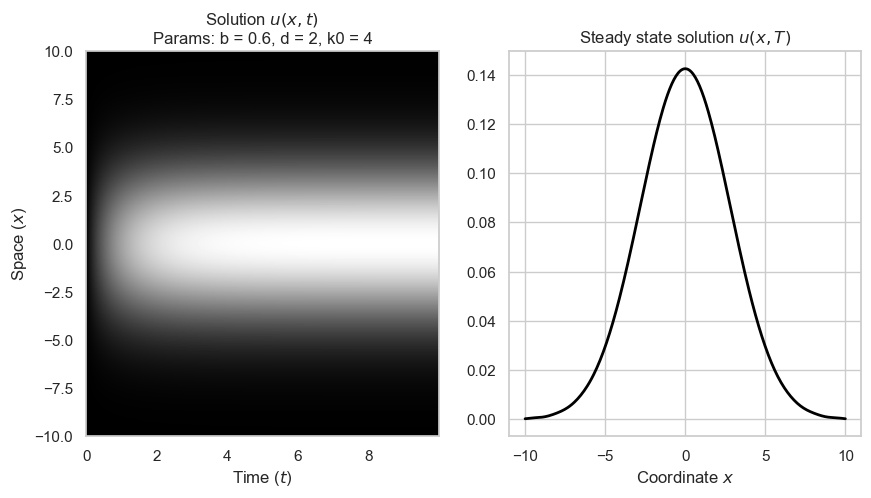

In [97]:
args = default_args.copy()
args['b']  = 0.6
args['d']  = 2
args['k0'] = 4
args['T'] = 10
args['dt'] = 1e-2
args['tau'] = 1

t, x, u = run_simulation(args)
plot_simulation(t, x, u, args)

#### 2. d > b with noise 

{'A': -10, 'B': 10, 'n': 300, 'tau': 10, 'a': 1, 'b': 0.6, 'd': 2, 'k0': 4, 'dt': 0.01, 'T': 10, 'add_noise': True, 'sigma': 0.01}


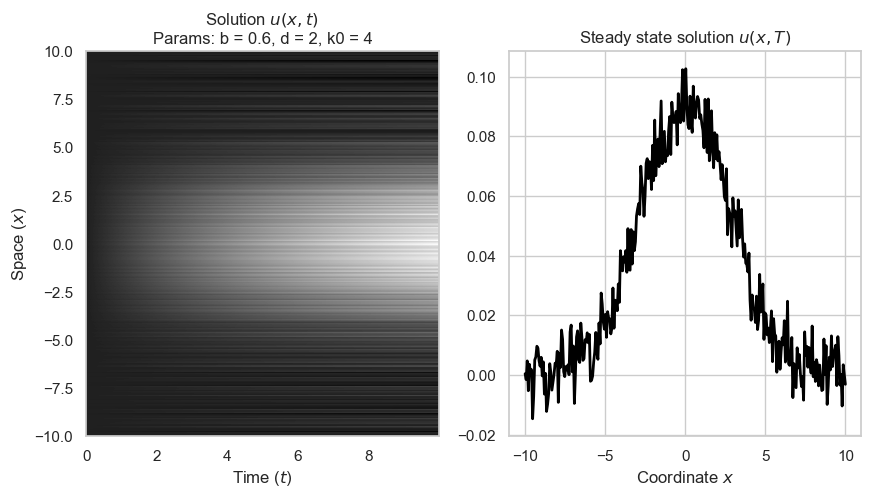

In [99]:
args = default_args.copy()
args['b']  = 0.6
args['d']  = 2
args['k0'] = 4
args['T'] = 10
args['add_noise'] = True

t, x, u = run_simulation(args)
plot_simulation(t, x, u, args)

#### 3. b >> d

{'A': -10, 'B': 10, 'n': 300, 'tau': 10, 'a': 1, 'b': 4, 'd': 0.2, 'k0': 4, 'dt': 0.01, 'T': 50, 'add_noise': False, 'sigma': 0.01}


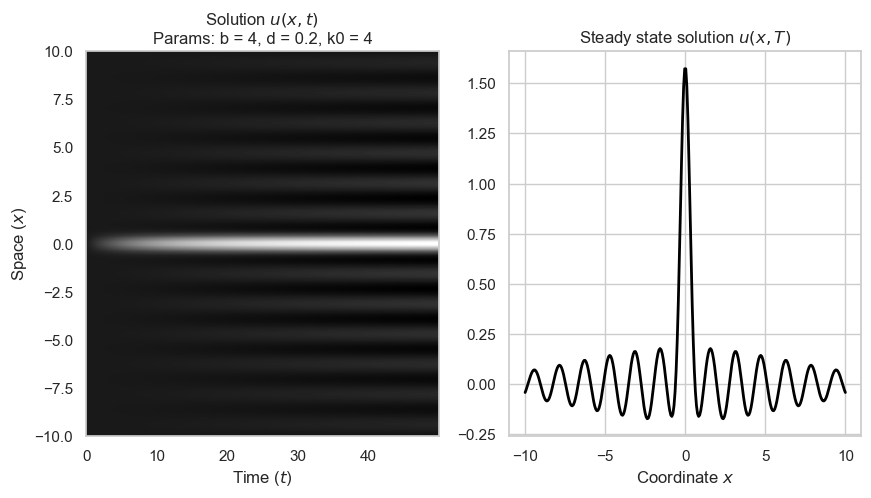

In [102]:
args = default_args.copy()
args['b']  = 4
args['d']  = 0.2
args['k0'] = 4
args['T'] = 50
args['add_noise'] = False

t, x, u = run_simulation(args)
plot_simulation(t, x, u, args)

{'A': -10, 'B': 10, 'n': 300, 'tau': 10, 'a': 1, 'b': 4, 'd': 0.2, 'k0': 8, 'dt': 0.01, 'T': 50, 'add_noise': False, 'sigma': 0.01}


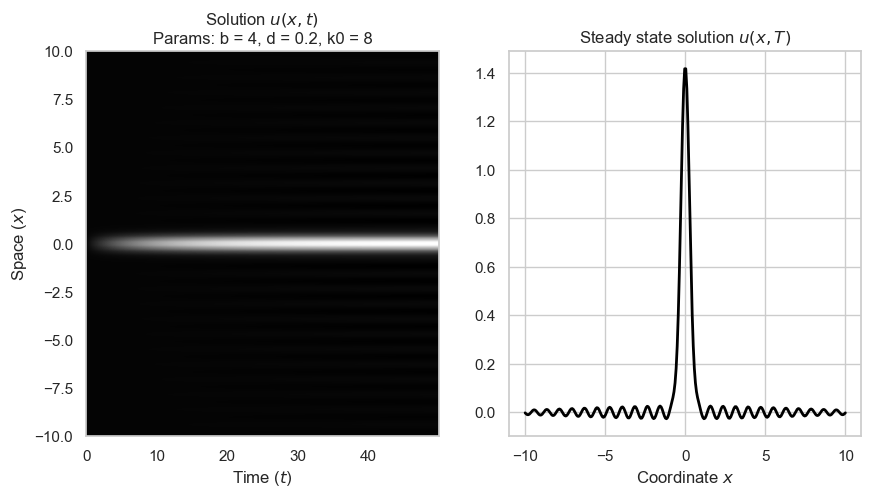

In [103]:
args = default_args.copy()
args['b']  = 4
args['d']  = 0.2
args['k0'] = 8
args['T'] = 50
args['add_noise'] = False

t, x, u = run_simulation(args)
plot_simulation(t, x, u, args)

#### 4. b >> d + noise

{'A': -10, 'B': 10, 'n': 300, 'tau': 10, 'a': 1, 'b': 4, 'd': 0.2, 'k0': 4, 'dt': 0.01, 'T': 50, 'add_noise': True, 'sigma': 0.01}


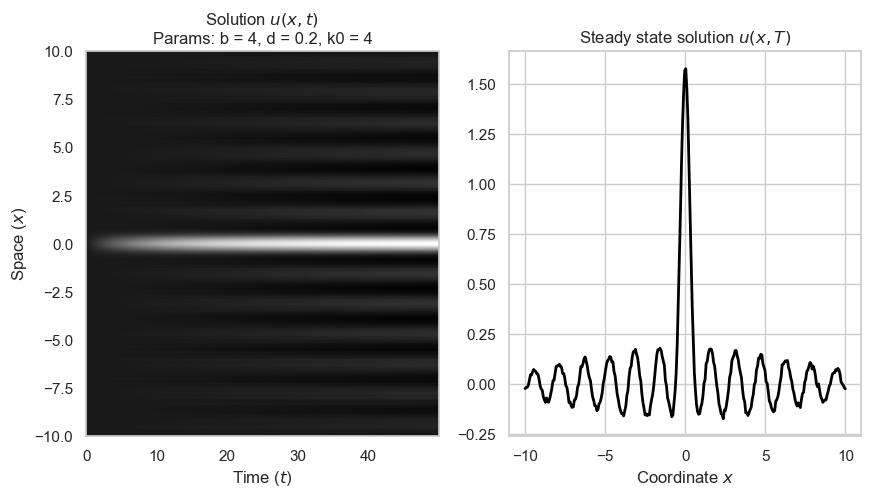

In [104]:
args = default_args.copy()
args['b']  = 4
args['d']  = 0.2
args['k0'] = 4
args['T'] = 50
args['add_noise'] = True

t, x, u = run_simulation(args)
plot_simulation(t, x, u, args)

**Observations:** 

- With weak interactions ($b < d$) the field acts like an integrator of the input. It quickly converges to a steady-state solution predicted by the analytical derivations and IFFT - a gaussian peak with the shape coinciding with shape of the input.
- This solution is stable even with small perturbations added to the input component. The solution again repeats the shape of the input.
- With Gabor filter-like interactions between elements of the field the solution begins to have a steady state solution oscillating in space with Gabor filter's preferred frequency $k_0$. At the same time a strong peak in the origin is observed.
- Overall, the simulated steady-state solutions perfectly correspond to the solutions obtained analytically using Fourier transform. This means that the assumption that $\cdot{u} = 0$ can be fulfilled and achieved by a real system. Using IFFT it is fast and easy to obtain spatial-(temporal-)domain solution given the analytically derived Fourier coefficients. 
- The network with Gabor-filter interactions will act like resonator, amplifying preferred spatial frequencies and creating a stable spatial pattern governed by self-organization of field elements.
